# Intrusion Detection Evaluation Dataset (CIC-IDS2017)
By AliK604 

Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

Problems with this dataset:
A ratio of 4:1 between Benign and Malicious, it should be higher to perform network anomaly detection with clustering

In [9]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/55/d5/0a1c65b13ab5a24178d162d0cfd3f8a709588388cc5bdd32b17c119f6d54/shap-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 910.8 kB/s eta 0:00:00a 0:00:01


In [52]:
# %config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as matplot
import matplotlib.pyplot as plt
# %matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings, os 
# warnings.filterwarnings("ignore")

# from keras import Sequential
# from keras.models import Model, load_model
# from keras.layers import *
# from keras.callbacks import ModelCheckpoint
# from keras import regularizers
from matplotlib import pyplot as plt

from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, TruncatedSVD, PCA
from sklearn.svm import LinearSVC

import xgboost, lightgbm
# from mlxtend.classifier import EnsembleVoteClassifier 
import shap
import sklearn.neighbors



In [53]:
ls = [] 
directory = (r'./Dataset/MachineLearningCVE/')
for filename in os.listdir(r'./Dataset/MachineLearningCVE/'):
  if '.csv' in  filename:
    print(filename)
    full_path = os.path.join(directory, filename)
    df = pd.read_csv(full_path)
    ls.append(df)
    print(f'Shape: {df.shape}. Attack Type {df[" Label"].unique()}')
    # break

Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Shape: (288602, 79). Attack Type ['BENIGN' 'Infiltration']
Monday-WorkingHours.pcap_ISCX.csv
Shape: (529918, 79). Attack Type ['BENIGN']
Friday-WorkingHours-Morning.pcap_ISCX.csv
Shape: (191033, 79). Attack Type ['BENIGN' 'Bot']
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Shape: (286467, 79). Attack Type ['BENIGN' 'PortScan']
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Shape: (225745, 79). Attack Type ['BENIGN' 'DDoS']
Tuesday-WorkingHours.pcap_ISCX.csv
Shape: (445909, 79). Attack Type ['BENIGN' 'FTP-Patator' 'SSH-Patator']
Wednesday-workingHours.pcap_ISCX.csv
Shape: (692703, 79). Attack Type ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Shape: (170366, 79). Attack Type ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


In [54]:
for df in ls:
  cols = df.columns.to_list()
  for i in range(len(cols)):
    cols[i] = cols[i].strip()
  df.columns = cols

In [55]:
df = pd.concat(ls)
pd.set_option('display.max_columns', None)
df.head(10)
assert df.shape[1] == 79

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                22            166                  1                       1   
1             60148             83                  1                       2   
2               123          99947                  1                       1   
3               123          37017                  1                       1   
4                 0      111161336                147                       0   
5               123          38407                  1                       1   
6               443         188867                  9                       7   
7               443         213931                 10                       8   
8               443           3085                  1                       2   
9                80      115345043                 17                      15   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                            0                            0   
1                            0                            0   
2                           48                           48   
3                           48                           48   
4                            0                            0   
5                           48                           48   
6                          528                         4513   
7                          563                         4549   
8                            6                           44   
9                          952                         1498   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                0.000000   
1                      0                      0                0.000000   
2                     48                     48               48.000000   
3                     48                     48               48.000000   
4                      0                      0                0.000000   
5                     48                     48               48.000000   
6                    200                      0               58.666667   
7                    206                      0               56.300000   
8                      6                      6                6.000000   
9                    434                      0               56.000000   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0               0.000000                      0                      0   
1               0.000000                      0                      0   
2               0.000000                     48                     48   
3               0.000000                     48                     48   
4               0.000000                      0                      0   
5               0.000000                     48                     48   
6              79.982811                   1430                      0   
7              73.920453                   1430                      0   
8               0.000000                     38                      6   
9             142.281411                    746                      0   

   Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
0                0.000000               0.000000      0.000000   
1                0.000000               0.000000      0.000000   
2               48.000000               0.000000    960.509070   
3               48.000000               0.000000   2593.403031   
4                0.000000               0.000000      0.000000   
5               48.000000               0.000000   2499.544354   
6              644.714286             693.433658  26690.740040   
7              568.625000             677.650761  23895.555110   
8               22.000000              22.627417  16207.455430   
9               99.866667             262.333993     21.240618   

   Flow Packets/s  Flow IAT Mean  Flow IAT Std  F

In [56]:
# mix of ints and floats. Label is a object (words)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # df.dtypes


In [57]:
from collections import Counter

Counter(df["Label"])

Counter({'BENIGN': 2273097,
         'DoS Hulk': 231073,
         'PortScan': 158930,
         'DDoS': 128027,
         'DoS GoldenEye': 10293,
         'FTP-Patator': 7938,
         'SSH-Patator': 5897,
         'DoS slowloris': 5796,
         'DoS Slowhttptest': 5499,
         'Bot': 1966,
         'Web Attack � Brute Force': 1507,
         'Web Attack � XSS': 652,
         'Infiltration': 36,
         'Web Attack � Sql Injection': 21,
         'Heartbleed': 11})

In [58]:
#### Sample out benign data to a ratio of Benign : Malicious = 4:10
# print(f'df.shape {df.shape} before sampling out most of benign data')
# df = pd.concat([df[df['Label'] != 'BENIGN'], df[df['Label'] == 'BENIGN'].sample(frac=.1, random_state=42)]) # 20% of total is Malicious; Use only a sample of the BENIGN data
# print(f'df.shape {df.shape} after sampling out most of benign data')

#### Sample out Malicious data such that it would become an outlier
print(f'df.shape {df.shape} Before Sampling Out')
df = pd.concat([df[df['Label'] == 'BENIGN'], df[df['Label'] != 'BENIGN'].sample(frac=0.3, random_state=42)]) 
print(f'df.shape {df.shape} after Sampling Out')

# #### filter out malicious data
# print(f'df.shape {df.shape} Before Sampling Out')
# df = df[df['Label'] == 'BENIGN']
# print(f'df.shape {df.shape} after Sampling Out')


df.shape (2830743, 79) Before Sampling Out
df.shape (2440391, 79) after Sampling Out


In [59]:
##### Group the labels
def merge_dict(label):
    if "DoS" in label:
        return "DoS"
    if "Web" in label:
        return "Web Attack"
    if "Patator" in label:
        return "Patator"
    return label
df['strLabel'] = df['Label'].apply(lambda x: merge_dict(str(x)))
Counter(df["strLabel"])



Counter({'BENIGN': 2273097,
         'DoS': 114338,
         'PortScan': 47527,
         'Patator': 4152,
         'Web Attack': 658,
         'Bot': 609,
         'Infiltration': 7,
         'Heartbleed': 3})

In [60]:
##### Label into numerical values
le = LabelEncoder()
df['Label'] = le.fit_transform(df['strLabel'])
df.head(3)
le.classes_

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                22            166                  1                       1   
1             60148             83                  1                       2   
2               123          99947                  1                       1   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                            0                            0   
1                            0                            0   
2                           48                           48   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                     0.0   
1                      0                      0                     0.0   
2                     48                     48                    48.0   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0                    0.0                      0                      0   
1                    0.0                      0                      0   
2                    0.0                     48                     48   

   Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
0                     0.0                    0.0       0.00000   
1                     0.0                    0.0       0.00000   
2                    48.0                    0.0     960.50907   

   Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  \
0    12048.192770          166.0      0.000000           166           166   
1    36144.578310           41.5     10.606602            49            34   
2       20.010606        99947.0      0.000000         99947         99947   

   Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  \
0              0           0.0          0.0            0            0   
1              0           0.0          0.0            0            0   
2              0           0.0          0.0            0            0   

   Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  \
0              0           0.0          0.0            0            0   
1             49          49.0          0.0           49           49   
2              0           0.0          0.0            0            0   

   Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   

   Fwd Header Length  Bwd Header Length  Fwd Packets/s  Bwd Packets/s  \
0                 32                 32    6024.096386    6024.096386   
1                 32                 64   12048.192770   24096.385540   
2                 40                 40      10.005303      10.005303   

   Min Packet Length  Max Packet Length  Packet Length Mean  \
0                  0                  0                 0.0   
1                  0                  0                 0.0   
2                 48                 48                48.0   

   Packet Length Std  Packet Length Variance  FIN Flag Count  SYN Flag Count  \
0                0.0                     0.0               0               0   
1                0.0                     0.0               0               0   
2                0.0                     0.0               0               0   

   RST Flag Count  PSH Flag Count  ACK Flag Count  URG Flag Count  \
0               0               0               1               1   
1               0               0               1               1   
2               0               0               0               0   

   CWE Flag Count  ECE Flag Count  Down/Up Ratio  Average Packet Size  \
0               0               0              1                  0.0   
1               0               0              2                  0.0   
2               0               0      

array(['BENIGN', 'Bot', 'DoS', 'Heartbleed', 'Infiltration', 'Patator',
       'PortScan', 'Web Attack'], dtype=object)

In [61]:
##### Shuffle the dataset and Crop it
df = df.sample(frac = 1, random_state=42).reset_index(drop=True)
df

Destination Port  Flow Duration  Total Fwd Packets  \
0                      80            109                  2   
1                      53          51451                  2   
2                     443      116352886                 19   
3                   55871              3                  2   
4                      53      115994888                  2   
...                   ...            ...                ...   
2440386                80      119997744                 15   
2440387                22        1561949                 35   
2440388                80        6083515                  4   
2440389             51652             66                  1   
2440390                53         163298                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             2                           94   
2                            19                         1066   
3                             0                           37   
4                             2                          100   
...                         ...                          ...   
2440386                      15                         3006   
2440387                      40                         2686   
2440388                       0                           24   
2440389                       1                            6   
2440390                       1                           57   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                220                     47   
2                               3669                    437   
3                                  0                     37   
4                                275                     50   
...                              ...                    ...   
2440386                         1586                    978   
2440387                         6718                    408   
2440388                            0                      6   
2440389                            6                      6   
2440390                          140                     57   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                6.000000               0.000000   
1                           47               47.000000               0.000000   
2                            0               56.105263             126.375496   
3                            0               18.500000              26.162951   
4                           50               50.000000               0.000000   
...                        ...                     ...                    ...   
2440386                      6              200.400000             402.446234   
2440387                      0               76.742857             105.426959   
2440388                      6                6.000000               0.000000   
2440389                      6                6.000000               0.000000   
2440390                     57               57.000000               0.000000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                0.000000   
1                          110                    110              110.000000   
2                         1460                      0              193.105263   
3                            0                      0                0.000000   
4                          149                    126              137.500000   
...                        ...                    ...                     ...   
2440386                    784                      0              105.733333   
2440387                    976                      0              167.950000   
2440388                 

In [62]:
df = df[:]
counter_dict = Counter(df['Label'])
print(counter_dict)
n_benign = counter_dict[0]
n_malicious = df.shape[0] - counter_dict[0]
print(f'Benign : Malicious = {n_benign/n_malicious} : {1}')

Counter({0: 2273097, 2: 114338, 6: 47527, 5: 4152, 7: 658, 1: 609, 4: 7, 3: 3})
Benign : Malicious = 13.58743888005547 : 1


In [63]:
df['Label'] = df['Label'].map(lambda x: 0 if x == 0 else 1)

Destination Port  Flow Duration  Total Fwd Packets  \
0                      80            109                  2   
1                      53          51451                  2   
2                     443      116352886                 19   
3                   55871              3                  2   
4                      53      115994888                  2   
...                   ...            ...                ...   
2440386                80      119997744                 15   
2440387                22        1561949                 35   
2440388                80        6083515                  4   
2440389             51652             66                  1   
2440390                53         163298                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             2                           94   
2                            19                         1066   
3                             0                           37   
4                             2                          100   
...                         ...                          ...   
2440386                      15                         3006   
2440387                      40                         2686   
2440388                       0                           24   
2440389                       1                            6   
2440390                       1                           57   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                220                     47   
2                               3669                    437   
3                                  0                     37   
4                                275                     50   
...                              ...                    ...   
2440386                         1586                    978   
2440387                         6718                    408   
2440388                            0                      6   
2440389                            6                      6   
2440390                          140                     57   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                6.000000               0.000000   
1                           47               47.000000               0.000000   
2                            0               56.105263             126.375496   
3                            0               18.500000              26.162951   
4                           50               50.000000               0.000000   
...                        ...                     ...                    ...   
2440386                      6              200.400000             402.446234   
2440387                      0               76.742857             105.426959   
2440388                      6                6.000000               0.000000   
2440389                      6                6.000000               0.000000   
2440390                     57               57.000000               0.000000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                0.000000   
1                          110                    110              110.000000   
2                         1460                      0              193.105263   
3                            0                      0                0.000000   
4                          149                    126              137.500000   
...                        ...                    ...                     ...   
2440386                    784                      0              105.733333   
2440387                    976                      0              167.950000   
2440388                 

##### Data Preprocessing

In [65]:
import gc 
gc.collect()

3531

In [66]:
labels = df['Label'].copy()
strLabels = df['strLabel'].copy()
df.drop(columns='Label', axis=1, inplace=True)
df.drop(columns='strLabel', axis=1, inplace=True)

df = df[:]

df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
df = df.fillna(df.mean())

df.dropna(inplace=True)
df = df.select_dtypes(include=[np.number])
# df = df.loc[:, (df != df.iloc[0]).any()] #Remove features that are constant
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df = df[indices_to_keep]


for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != np.inf]
    df = df[df[i] != -np.inf]
    df = df[df[i] != ",,"]
    df = df[df[i] != ", ,"]
    
print(np.any(np.isnan(df)))
print(np.any(np.isfinite(df)))


# Last column turn to binary
# df.iloc[:, -1] = df.iloc[:, -1].apply(lambda x: 1 if x != 0 else 0).astype(int)
df['Label'] = labels
# df['strLabel'] = strLabels


X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'],axis=1), df['Label'], test_size=.20, random_state=42)


False
True


In [43]:
def benchmark(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
  GBM = lightgbm.LGBMClassifier(objective='binary', n_estimators= 50)
  clfs = [GBM]
  for clf in clfs:
      _ = clf.fit(X_train, y_train)
      pred = clf.score(X_test, y_test)
      name = str(type(clf)).split(".")[-1][:-2]
      print("Acc: %0.5f for the %s" % (pred, name))
  return clfs

# Accuracy Evaluation

In [66]:
print('Baseline with all features')
clfs = benchmark()

Baseline with all features


[LightGBM] [Fatal] Number of classes must be 1 for non-multiclass training


LightGBMError: Number of classes must be 1 for non-multiclass training

In [20]:
print('Solely with features identified as useless')

GBM = clfs[0]
remove = X_train.columns.to_numpy()[GBM.feature_importances_ == 0] 
clfs = benchmark(X_train[remove], X_test[remove])
print(remove)

Solely with features identified as useless
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99726 for the LGBMClassifier
['Fwd URG Flags' 'SYN Flag Count' 'RST Flag Count' 'CWE Flag Count'
 'ECE Flag Count' 'Avg Fwd Segment Size' 'Avg Bwd Segment Size'
 'Fwd Header Length.1' 'Subflow Fwd Packets' 'Subflow Fwd Bytes'
 'Subflow Bwd Packets' 'Subflow Bwd Bytes']


In [21]:
print('Solely with features identified as useful')
clfs = benchmark(X_train.drop(remove,axis=1), X_test.drop(remove,axis=1))

Solely with features identified as useful
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12793
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99935 for the LGBMClassifier


In [22]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print('PCA 5')
pca = PCA(5)
_ = benchmark(pca.fit_transform(X_train), pca.transform(X_test))

PCA 5
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99516 for the LGBMClassifier


In [23]:
print('PCA 15')
pca = PCA(15)
_ = benchmark(pca.fit_transform(X_train), pca.transform(X_test))

PCA 15
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99737 for the LGBMClassifier


In [24]:
print('PCA 25')
pca = PCA(25)
_ = benchmark(pca.fit_transform(X_train), pca.transform(X_test))

PCA 25
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99767 for the LGBMClassifier


In [25]:
tmp = np.argsort(GBM.feature_importances_)
tmp = tmp[::-1] # large to small 
top = tmp[:20] # index of the top N
rest = tmp[20:]
print(GBM.feature_importances_[top]) # check 

[178 169  99  98  86  56  55  46  43  36  35  33  32  30  29  29  26  25
  24  24]


In [26]:
print('Top 20 features (per `LGBMClassifier`) + PCA(15) of remaining') # 2nd highest 
pca = PCA(15)

a = pd.concat([X_train.iloc[:, top], pd.DataFrame(pca.fit_transform(X_train.iloc[:, rest]))], axis=1, ignore_index=True) 
b = pd.concat([X_test.iloc[:, top] , pd.DataFrame(pca.transform    (X_test.iloc[:, rest])) ], axis=1, ignore_index=True) 

_ = benchmark(a, b)

Top 20 features (per `LGBMClassifier`) + PCA(15) of remaining
[LightGBM] [Info] Number of positive: 22409, number of negative: 1818374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8431
[LightGBM] [Info] Number of data points in the train set: 1840783, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012174 -> initscore=-4.396235
[LightGBM] [Info] Start training from score -4.396235
Acc: 0.99933 for the LGBMClassifier


# Conclusion 

**Baseline with all features**
* Acc: 0.98591 for the LGBMClassifier

Solely with features identified as useless
* Acc: 0.95991 for the LGBMClassifier

Solely with features identified as useful
* Acc: 0.96422 for the LGBMClassifier

PCA 5
* Acc: 0.92331 for the LGBMClassifier

PCA 15
* Acc: 0.94629 for the LGBMClassifier

PCA 25
* Acc: 0.94210 for the LGBMClassifier

**Top 20 features (per `LGBMClassifier`) + PCA(15) of remaining**
* Acc: 0.98277 for the LGBMClassifier

# SHAP

In [67]:
X_train

Destination Port  Flow Duration  Total Fwd Packets  \
1534829                53         307667                  2   
767952                 80        5085484                  2   
321453                443      115871543                 20   
2413095               443          97178                  3   
471278                 80       98907001                  7   
...                   ...            ...                ...   
110268                 53            149                  2   
1692743               443          52800                  1   
2356330                80       15140021                  6   
2229084                80       19606415                  5   
2219110                53          66617                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
1534829                       2                           68   
767952                        2                            6   
321453                       18                          839   
2413095                       3                           86   
471278                        6                          346   
...                         ...                          ...   
110268                        2                           92   
1692743                       1                            0   
2356330                       5                         2878   
2229084                       5                          434   
2219110                       1                           44   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
1534829                          128                     34   
767952                           212                      6   
321453                          6776                    387   
2413095                            7                     86   
471278                         11595                    346   
...                              ...                    ...   
110268                           124                     46   
1692743                            0                      0   
2356330                         1067                   1442   
2229084                         1963                    434   
2219110                          138                     44   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
1534829                     34               34.000000               0.000000   
767952                       0                3.000000               4.242641   
321453                       0               41.950000              95.690001   
2413095                      0               28.666667              49.652123   
471278                       0               49.428571             130.775708   
...                        ...                     ...                    ...   
110268                      46               46.000000               0.000000   
1692743                      0                0.000000               0.000000   
2356330                      0              479.666667             742.712506   
2229084                      0               86.800000             194.090700   
2219110                     44               44.000000               0.000000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
1534829                     64                     64               64.000000   
767952                     212                      0              106.000000   
321453                    2021                      0              376.444444   
2413095                      7                      0                2.333333   
471278                    5792                      0             1932.500000   
...                        ...                    ...                     ...   
110268                      62                     62               62.000000   
1692743                      0                      0                0.000000   
2356330                 

In [69]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')

# GBM = lightgbm.LGBMClassifier(objective='binary', n_estimators= 50)
_ = model.fit(X_train, y_train)
model_outputs = model.predict(X_train)

pred = model.score(X_test, y_test)
name = str(type(model)).split(".")[-1][:-2]
print("Acc: %0.5f for the %s" % (pred, name))



Acc: 0.99935 for the XGBClassifier


In [ ]:
model.save_model("xgboost_ids.json")

In [70]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
np.shape(shap_values.values)


[11:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


(1952312, 78)

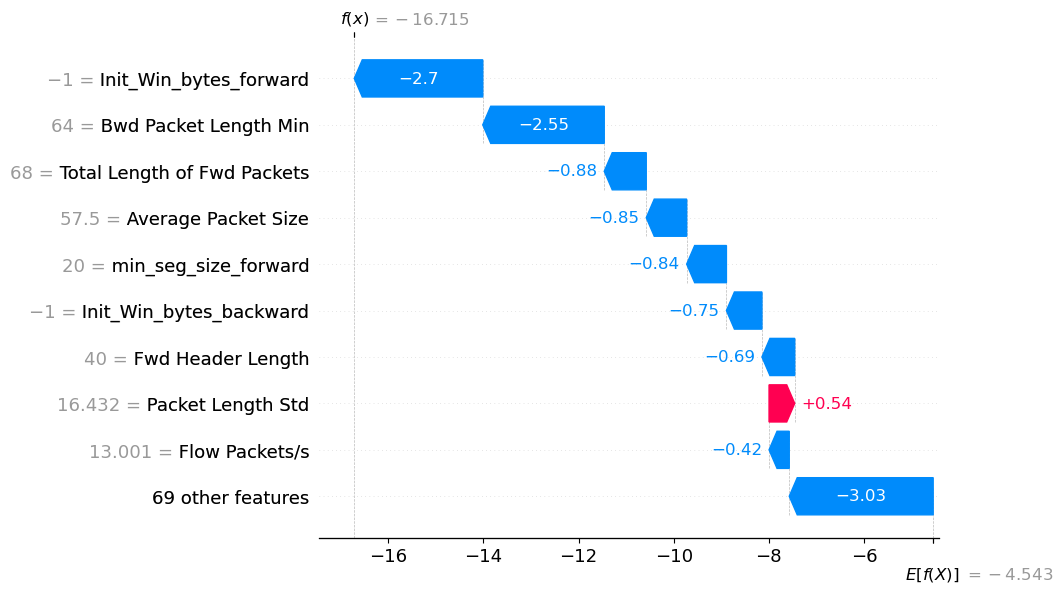

In [72]:
shap.plots.waterfall(shap_values[0])
plt.show()


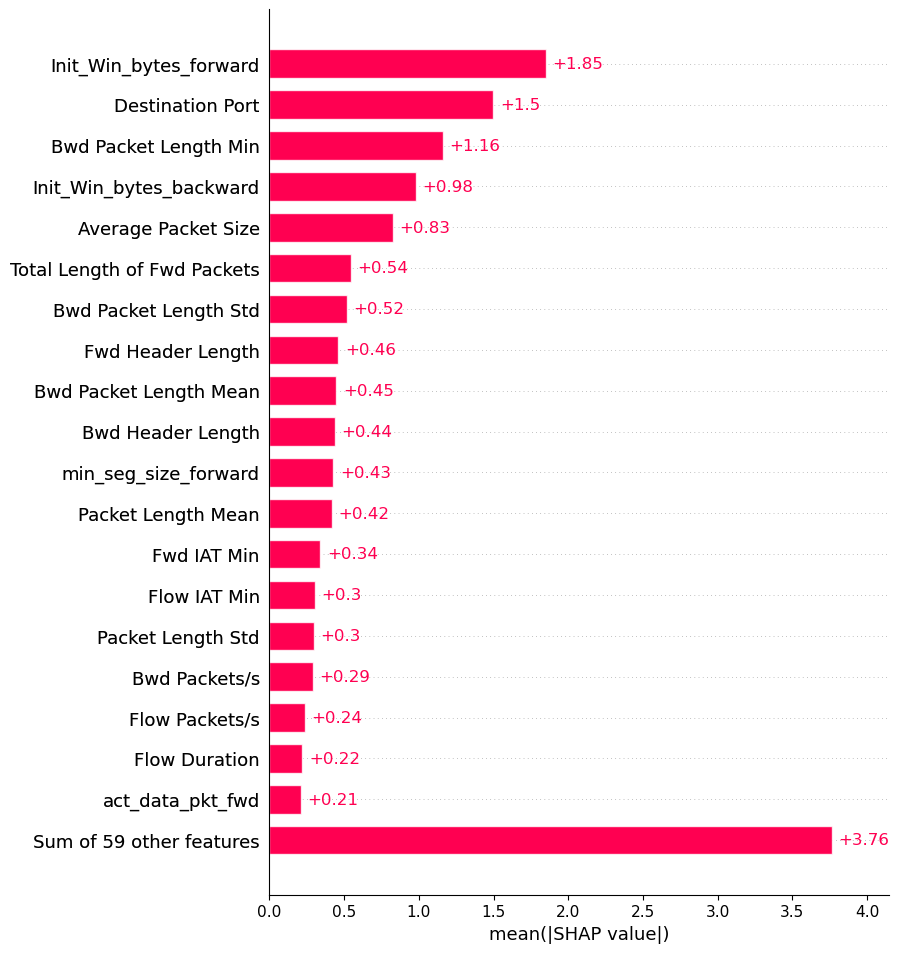

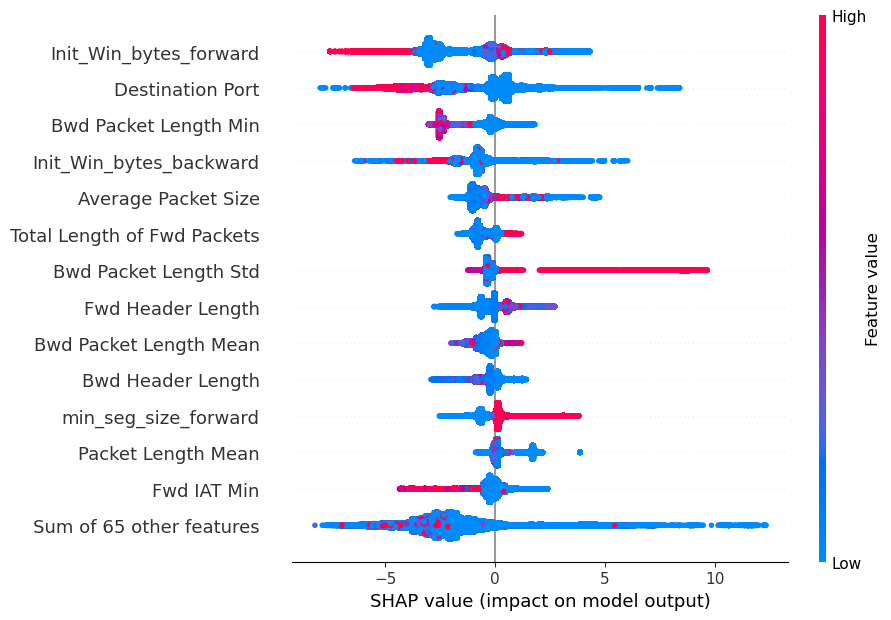

In [73]:
shap.plots.bar(shap_values, max_display=20, )
plt.show()

shap.plots.beeswarm(shap_values, max_display=14)
plt.show()

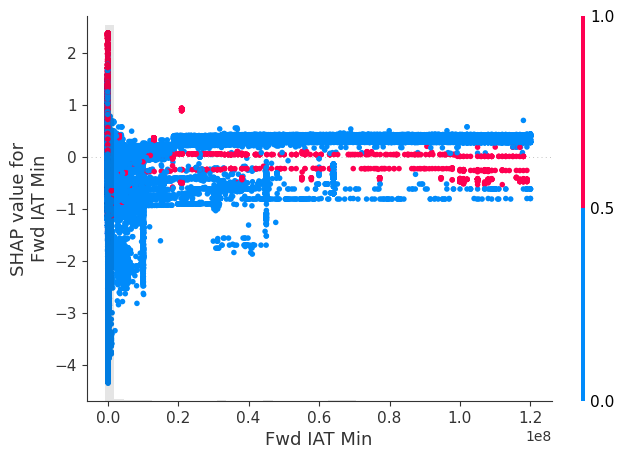

In [74]:
# shap.plots.scatter(shap_values[:,'Destination Port'], color=shap_values[:,'Label'])
shap.plots.scatter(shap_values[:,'Fwd IAT Min'], color=model_outputs)
plt.show()

In [101]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train.columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)



In [103]:
feature_importance['col_name']

0          Init_Win_bytes_forward
11                  Bwd Packets/s
4         Init_Win_bytes_backward
13                  Flow Duration
12              Packet Length Std
19                 PSH Flag Count
15                  Fwd Packets/s
1                Destination Port
10           min_seg_size_forward
2             Average Packet Size
6     Total Length of Bwd Packets
5           Bwd Packet Length Min
14                    Fwd IAT Min
18              Fwd Header Length
16         Total Backward Packets
3     Total Length of Fwd Packets
9          Bwd Packet Length Mean
17              Bwd Header Length
7              Packet Length Mean
8                    Flow IAT Min
Name: col_name, dtype: object

# Feature Pruning

In [104]:
feature_importance = ['Init_Win_bytes_forward', 'Bwd Packets/s',
       'Init_Win_bytes_backward', 'Flow Duration', 'Packet Length Std',
       'PSH Flag Count', 'Fwd Packets/s', 'Destination Port',
       'min_seg_size_forward', 'Average Packet Size',
       'Total Length of Bwd Packets', 'Bwd Packet Length Min',
       'Fwd IAT Min', 'Fwd Header Length', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Bwd Packet Length Mean',
       'Bwd Header Length', 'Packet Length Mean', 'Flow IAT Min'],

pruned_features=['Init_Win_bytes_forward', 'Bwd Packets/s',
'Init_Win_bytes_backward', 'Flow Duration', 'Packet Length Std',
#  'PSH Flag Count', #TODO
#  'Fwd Packets/s', #TODO
'Destination Port', 
#  'min_seg_size_forward', #TODO
'Average Packet Size', 
'Total Length of Bwd Packets', 'Bwd Packet Length Min',
#  'Fwd IAT Min', #TODO
'Fwd Header Length', 'Total Backward Packets',
'Total Length of Fwd Packets', 
'Bwd Packet Length Mean',
#  'Bwd Header Length', #TODO
#  'Packet Length Mean', #TODO
'Flow IAT Min']
pruned_features


['Init_Win_bytes_forward',
 'Bwd Packets/s',
 'Init_Win_bytes_backward',
 'Flow Duration',
 'Packet Length Std',
 'Destination Port',
 'Average Packet Size',
 'Total Length of Bwd Packets',
 'Bwd Packet Length Min',
 'Fwd Header Length',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Bwd Packet Length Mean',
 'Flow IAT Min']

In [105]:
pruned_df = df[pruned_features].copy()
pruned_df['Label'] = df['Label'].copy()
pruned_df

Init_Win_bytes_forward  Bwd Packets/s  Init_Win_bytes_backward  \
0                           254       0.000000                       -1   
1                            -1      38.871936                       -1   
2                          8192       0.163296                     5120   
3                           972       0.000000                       -1   
4                            -1       0.017242                       -1   
...                         ...            ...                      ...   
2440386                     256       0.125002                       90   
2440387                    8192      25.609031                      245   
2440388                     256       0.000000                       -1   
2440389                      68   15151.515150                      251   
2440390                      -1       6.123774                       -1   

         Flow Duration  Packet Length Std  Destination Port  \
0                  109           0.000000                80   
1                51451          34.506521                53   
2            116352886         333.275745               443   
3                    3          21.361960             55871   
4            115994888          48.610698                53   
...                ...                ...               ...   
2440386      119997744         367.649506                80   
2440387        1561949         248.812238                22   
2440388        6083515           0.000000                80   
2440389             66           0.000000             51652   
2440390         163298          47.920072                53   

         Average Packet Size  Total Length of Bwd Packets  \
0                   9.000000                            0   
1                  90.250000                          220   
2                 124.605263                         3669   
3                  37.000000                            0   
4                 106.250000                          275   
...                      ...                          ...   
2440386           185.666667                         1586   
2440387           125.386667                         6718   
2440388             7.500000                            0   
2440389             9.000000                            6   
2440390           127.000000                          140   

         Bwd Packet Length Min  Fwd Header Length  Total Backward Packets  \
0                            0                 40                       0   
1                          110                 64                       2   
2                            0                392                      19   
3                            0                 64                       0   
4                          126                 60                       2   
...                        ...                ...                     ...   
2440386                      0                300                      15   
2440387                      0                724                      40   
2440388                      0                 80                       0   
2440389                      6                 20                       1   
2440390                    140                 32                       1   

         Total Length of Fwd Packets  Bwd Packet Length Mean  Flow IAT Min  \
0                                 12                0.000000           109   
1                                 94              110.000000             1   
2                               1066              193.105263            23   
3                                 37                0.000000             3   
4                                100              137.500000         60753   
...                              ...                     ...           ...   
2440386                         3006              105.733333         32037   
2440387                         2686              167.950000         

In [106]:
X_train, X_test, y_train, y_test = train_test_split(pruned_df.drop(['Label'],axis=1), pruned_df['Label'], test_size=.20, random_state=42)

In [107]:
_ = model.fit(X_train, y_train)
model_outputs = model.predict(X_train)

pred = model.score(X_test, y_test)
name = str(type(model)).split(".")[-1][:-2]
print("Acc: %0.5f for the %s" % (pred, name))

Acc: 0.99923 for the XGBClassifier


In [108]:
model.save_model("xgboost_ids.json")

In [109]:
X_train['Destination Port']

1534829     53
767952      80
321453     443
2413095    443
471278      80
          ... 
110268      53
1692743    443
2356330     80
2229084     80
2219110     53
Name: Destination Port, Length: 1952312, dtype: int64

# Clustering

##### Filter Important Features

In [25]:
feature_importance = ['Init_Win_bytes_forward', 'Destination Port',
       'Average Packet Size', 'Total Length of Fwd Packets',
       'Init_Win_bytes_backward', 'Bwd Packet Length Min',
       'Total Length of Bwd Packets', 'Packet Length Mean',
       'Flow IAT Min', 'Bwd Packet Length Mean', 'min_seg_size_forward',
       'Bwd Packets/s', 'Packet Length Std', 'Flow Duration',
       'Fwd IAT Min', 'Fwd Packets/s', 'Total Backward Packets',
       'Bwd Header Length', 'Fwd Header Length', 'PSH Flag Count',
       'Total Fwd Packets', 'FIN Flag Count', 'Flow Bytes/s',
       'Fwd IAT Total', 'Active Min', 'Flow Packets/s',
       'Bwd Packet Length Std', 'Fwd IAT Std', 'Fwd IAT Max',
       'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Std',
       'Fwd Packet Length Mean', 'Max Packet Length', 'Bwd IAT Min',
       'Idle Min', 'Fwd Packet Length Max', 'ACK Flag Count',
       'Fwd Packet Length Std', 'URG Flag Count', 'Fwd IAT Mean',
       'Bwd IAT Total', 'Bwd IAT Mean', 'act_data_pkt_fwd', 'Active Std',
       'Min Packet Length', 'Bwd Packet Length Max', 'Bwd IAT Std',
       'Bwd IAT Max', 'Active Max']
# feature_importance['col_name'].values[:50]
feature_importance = feature_importance[:50]
# df_cropped= df.loc[:, feature_importance['col_name'].values[:20]]
df_cropped= df.loc[:, feature_importance]

<Axes: >

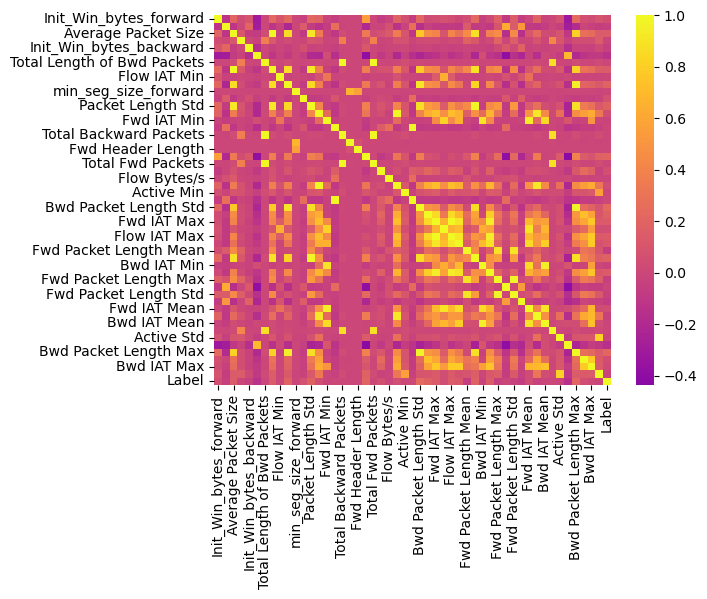

In [26]:
df_heatmap = df_cropped.copy()
df_heatmap['Label'] = df['Label']
corr_matrix = df_heatmap.corr()

sns.heatmap(corr_matrix,cmap='plasma',annot=False, center=0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = list(df_cropped.columns)
normalized_data = scaler.fit_transform(df_cropped)
normalized_df = pd.DataFrame(normalized_data, columns=features)
normalized_df

Init_Win_bytes_forward  Destination Port  Average Packet Size  \
0                     -0.453198         -0.460364            -0.545783   
1                     -0.470519         -0.461765            -0.226372   
2                      0.085980         -0.441522            -0.091315   
3                     -0.404429          2.435511            -0.435709   
4                     -0.470519         -0.461765            -0.163473   
...                         ...               ...                  ...   
2440386               -0.453062         -0.460364             0.148730   
2440387                0.085980         -0.463374            -0.088243   
2440388               -0.453062         -0.460364            -0.551679   
2440389               -0.465832          2.216520            -0.545783   
2440390               -0.470519         -0.461765            -0.081900   

         Total Length of Fwd Packets  Init_Win_bytes_backward  \
0                          -0.056592                -0.250342   
1                          -0.048776                -0.250342   
2                           0.043868                 0.316594   
3                          -0.054209                -0.250342   
4                          -0.048205                -0.250342   
...                              ...                      ...   
2440386                     0.228777                -0.240268   
2440387                     0.198276                -0.223108   
2440388                    -0.055448                -0.250342   
2440389                    -0.057164                -0.222444   
2440390                    -0.052303                -0.250342   

         Bwd Packet Length Min  Total Length of Bwd Packets  \
0                    -0.657249                    -0.007349   
1                     0.870657                    -0.007259   
2                    -0.657249                    -0.005844   
3                    -0.657249                    -0.007349   
4                     1.092898                    -0.007237   
...                        ...                          ...   
2440386              -0.657249                    -0.006699   
2440387              -0.657249                    -0.004593   
2440388              -0.657249                    -0.007349   
2440389              -0.573909                    -0.007347   
2440390               1.287359                    -0.007292   

         Packet Length Mean  Flow IAT Min  Bwd Packet Length Mean  \
0                 -0.528064     -0.054852               -0.491708   
1                 -0.248850     -0.054890               -0.236029   
2                 -0.041295     -0.054882               -0.042862   
3                 -0.449333     -0.054890               -0.491708   
4                 -0.194863     -0.033102               -0.172109   
...                     ...           ...                     ...   
2440386            0.204461     -0.043401               -0.245946   
2440387           -0.031482     -0.054890               -0.101332   
2440388           -0.528064     -0.054776               -0.491708   
2440389           -0.528064     -0.054867               -0.477762   
2440390           -0.196269      0.003675               -0.166298   

         min_seg_size_forward  Bwd Packets/s  Packet Length Std  \
0                    0.002742      -0.173450          -0.439317   
1                    0.002753      -0.172430          -0.363262   
2                    0.002742      -0.173446           0.295247   
3                    0.002753      -0.173450          -0.392234   
4                    0.002742      -0.173450          -0.332175   
...                       ...            ...                ...   
2440386              0.002742      -0.173447           0.371009   
2440387              0.002742      -0.172778           0.109083   
2440388              0.002742      -0.173450          -0.439317   
2440389              0.002742       0.224169          -0.439317   
2440390         

##### PCA => DBSCAN

In [286]:
pca_2d = PCA(n_components=2)
res_2d = pca_2d.fit_transform(normalized_df)
pca_2d_df = pd.DataFrame(data=res_2d, columns = [f'PC{i+1}' for i in range(res_2d.shape[1])])
pca_2d_df['Label'] = df['Label'].values

pca_3d = PCA(n_components=3)
res_3d = pca_3d.fit_transform(normalized_df)
pca_3d_df = pd.DataFrame(data=res_3d, columns = [f'PC{i+1}' for i in range(res_3d.shape[1])])
pca_3d_df['Label'] = df['Label'].values


pca_2d_df = pca_2d_df.loc[pca_2d_df['PC2']<=12]
pca_2d_df = pca_2d_df.loc[pca_2d_df['PC2']>=-12]
# pca_2d_df = pca_2d_df.loc[pca_2d_df['Label']!=0]


pca_3d_df = pca_3d_df.loc[pca_3d_df['PC2']<=12]
pca_3d_df = pca_3d_df.loc[pca_3d_df['PC2']>=-12]
# pca_3d_df = pca_3d_df.loc[pca_3d_df['Label']!=0]


print(pca_2d_df.head())
print(pca_3d_df.head())
print('Explained variation per principal component: {}'.format(pca_2d.explained_variance_ratio_))
print('Explained variation per principal component: {}'.format(pca_3d.explained_variance_ratio_))



KeyboardInterrupt: 

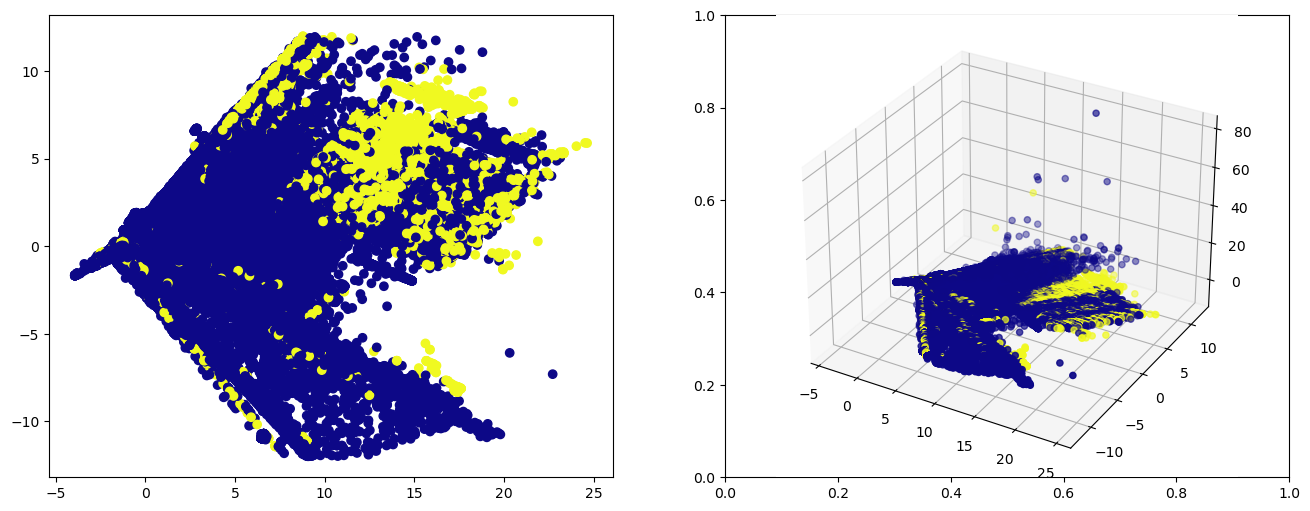

In [79]:

from mpl_toolkits.mplot3d import Axes3D
fig,ax = plt.subplots(1,2, figsize=(16,6))
ax[0].scatter(pca_2d_df['PC1'],pca_2d_df['PC2'], c=pca_2d_df['Label'], cmap = 'plasma')
ax[1] = fig.add_subplot(1,2,2,projection='3d')
ax[1].scatter(pca_3d_df['PC1'],pca_3d_df['PC2'],pca_3d_df['PC3'], c=pca_3d_df['Label'], cmap = 'plasma')
# ax = fig.add_subplot(111,projection='3d')
# ax.scatter(pca_numerical[:,0],pca_numerical[:,1],pca_numerical[:,2])
plt.show()

<Figure size 1600x1000 with 0 Axes>

The palette list has more values (10) than needed (1), which may not be intended.


<Axes: xlabel='PC1', ylabel='PC2'>

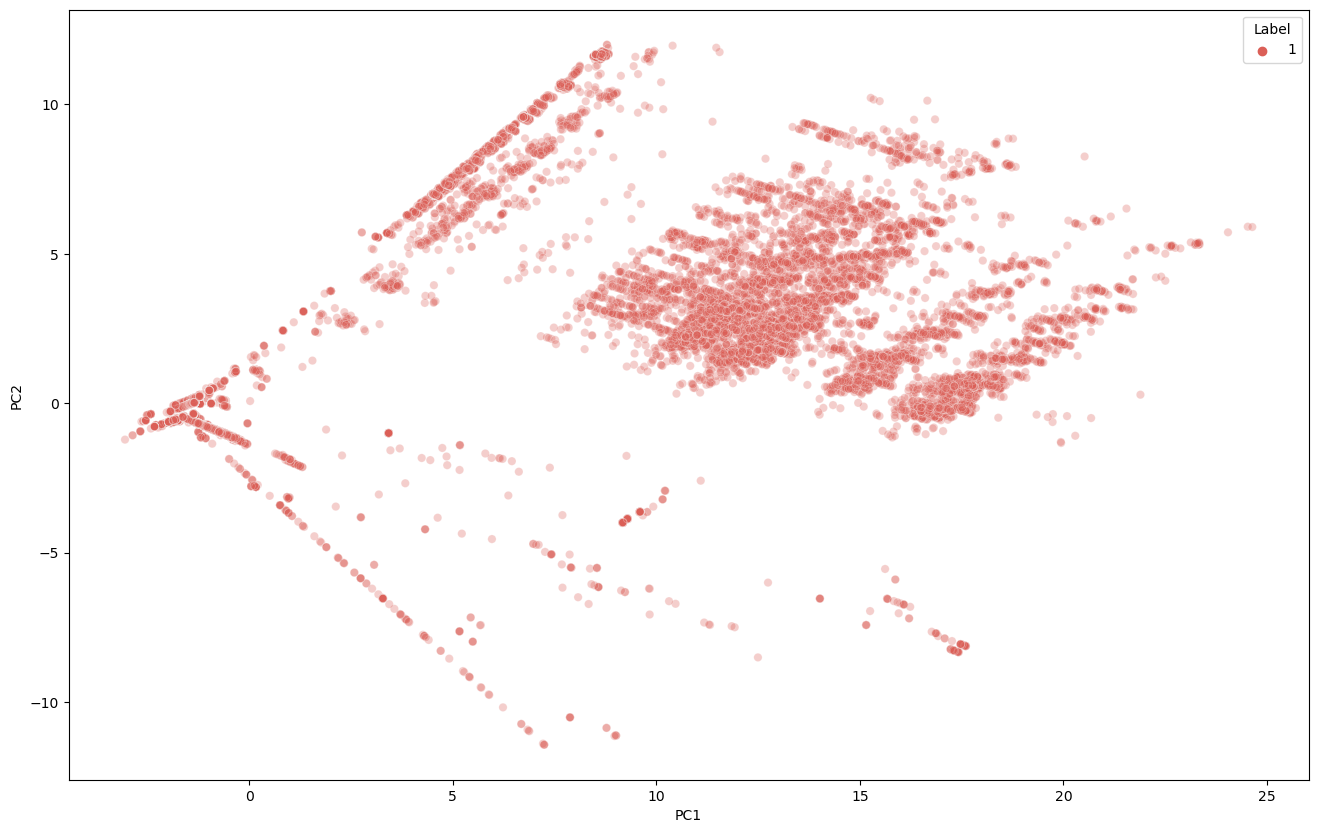

In [80]:
plt.figure(figsize=(16,10))
pca_2d_df = pca_2d_df.loc[pca_2d_df['Label'] != 0] 
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=pca_2d_df,
    legend="full",
    alpha=0.3
)

In [81]:
pca_2d_df


PC1       PC2  Label
6        5.598779  8.109843      1
17       4.874442  7.304569      1
76      11.281830  2.246394      1
92      -1.621060 -0.469454      1
118      6.963599  9.845107      1
...           ...       ...    ...
799911  -1.861911 -0.570389      1
799917  13.362331  3.402460      1
799920  -1.049397 -0.776107      1
799942  13.129446  3.876985      1
799984   5.622014  8.097262      1

[36810 rows x 3 columns]

In [82]:
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=pca_3d_df["PC1"], 
    ys=pca_3d_df["PC2"], 
    zs=pca_3d_df["PC3"], 
    c=pca_3d_df["Label"], 
    cmap='tab10'
)

plt.show()

##### T-SNE => DBSCAN

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random',learning_rate='auto', verbose=1)
# tsne = TSNE(n_components=2, init='random',learning_rate='auto', verbose=1, perplexity=90, n_iter=7000)

tsne_input = normalized_df[:25000]
tsne_results = tsne.fit_transform(tsne_input.values)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25000 samples in 0.002s...
[t-SNE] Computed neighbors for 25000 samples in 0.890s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25000
[t-SNE] Computed conditional probabilities for sample 2000 / 25000
[t-SNE] Computed conditional probabilities for sample 3000 / 25000
[t-SNE] Computed conditional probabilities for sample 4000 / 25000
[t-SNE] Computed conditional probabilities for sample 5000 / 25000
[t-SNE] Computed conditional probabilities for sample 6000 / 25000
[t-SNE] Computed conditional probabilities for sample 7000 / 25000
[t-SNE] Computed conditional probabilities for sample 8000 / 25000
[t-SNE] Computed conditional probabilities for sample 9000 / 25000
[t-SNE] Computed conditional probabilities for sample 10000 / 25000
[t-SNE] Computed conditional probabilities for sample 11000 / 25000
[t-SNE] Computed conditional probabilities for sample 12000 / 25000
[t-SNE] Computed conditional probabilities for sam

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

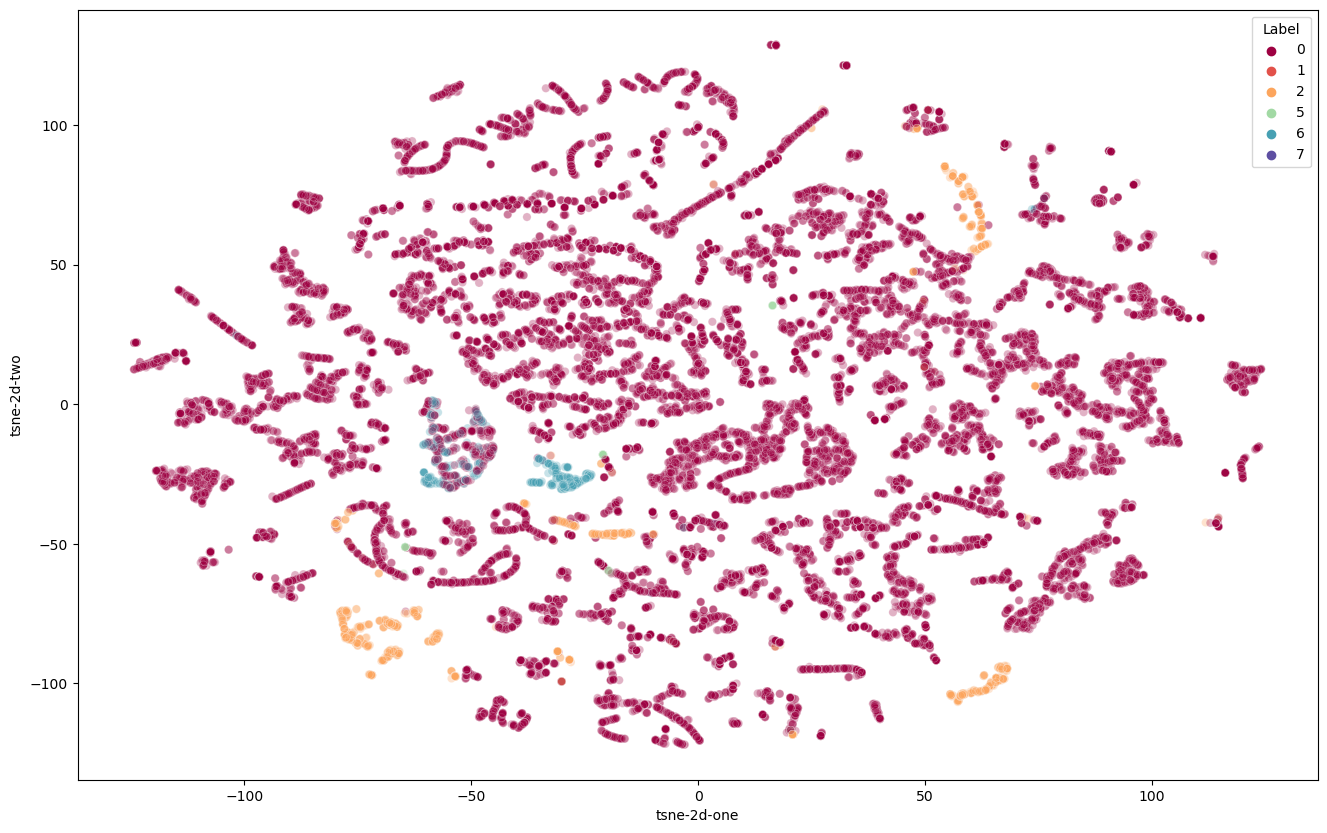

In [29]:
tsne_df = pd.DataFrame()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
x = df[:25000].copy()
tsne_df['Label'] = x['Label'].values
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("Spectral", as_cmap=True),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

In [ ]:
df[:25000]

Destination Port  Flow Duration  Total Fwd Packets  \
0                   443        5061507                  5   
1                    53            155                  2   
2                 58018          53042                  2   
3                  9220              3                  2   
4                 55380              5                  3   
...                 ...            ...                ...   
24995                53          65220                  2   
24996                53          24034                  2   
24997                80          47744                  3   
24998                80          50473                  1   
24999               443              3                  2   

       Total Backward Packets  Total Length of Fwd Packets  \
0                           1                          135   
1                           2                           90   
2                           1                            0   
3                           0                            4   
4                           0                           43   
...                       ...                          ...   
24995                       2                          148   
24996                       2                           72   
24997                       4                          438   
24998                       1                            0   
24999                       0                           12   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
0                               46                     46   
1                              222                     45   
2                                0                      0   
3                                0                      2   
4                                0                     31   
...                            ...                    ...   
24995                          312                     74   
24996                          194                     36   
24997                          860                    438   
24998                            0                      0   
24999                            0                      6   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                          6               27.000000              20.124612   
1                         45               45.000000               0.000000   
2                          0                0.000000               0.000000   
3                          2                2.000000               0.000000   
4                          6               14.333333              14.433757   
...                      ...                     ...                    ...   
24995                     74               74.000000               0.000000   
24996                     36               36.000000               0.000000   
24997                      0              146.000000             252.879418   
24998                      0                0.000000               0.000000   
24999                      6                6.000000               0.000000   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                         46                     46                    46.0   
1                        111                    111                   111.0   
2                          0                      0                     0.0   
3                          0                      0                     0.0   
4                          0                      0                     0.0   
...                      ...                    ...                     ...   
24995                    156                    156                   156.0   
24996                     97                     97                    97.0   
24997                    860                      0                   215.0   
24998                      0                      0      

In [ ]:
tsne_df

tsne-2d-one  tsne-2d-two  Label
0      -129.755859    99.667061      0
1         4.595508   109.233932      0
2       -70.684593  -143.037903      0
3       -37.264492   -45.872070      0
4       -91.994240   -71.325974      0
...            ...          ...    ...
24995    75.375282    17.397242      0
24996   -51.038143    59.609543      0
24997    20.354158    15.596382      0
24998     7.725525   -30.212170      0
24999   -20.139040   164.302246      0

[25000 rows x 3 columns]

##### DBSCAN

In [89]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples=20)
dbscan.fit(normalized_df[:25000])
cluster_labels = dbscan.labels_

DBSCAN(eps=2, min_samples=20)

In [90]:
len(cluster_labels)

25000

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

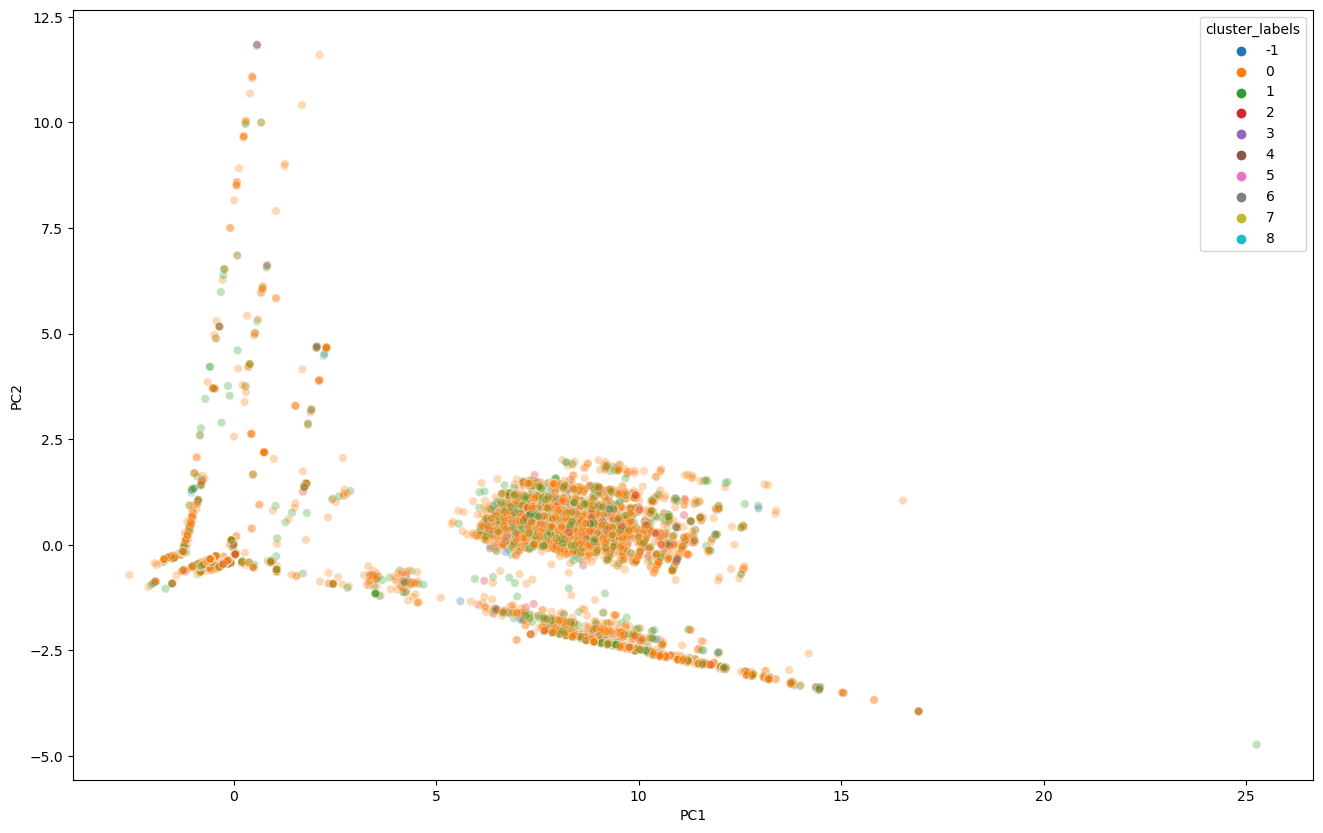

In [91]:
new_df = pca_2d_df[:25000].copy()
new_df['cluster_labels'] = cluster_labels

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="cluster_labels",
    palette=sns.color_palette("tab10", 10),
    data=new_df,
    legend="full",
    alpha=0.3
)

##### UMAP

In [20]:
import umap
reducer = umap.UMAP(n_neighbors=50,
                    min_dist=0.0,
                    n_components=2,
                    random_state=42)
embedding = reducer.fit_transform(normalized_df[:100000])
embedding_df = pd.DataFrame(embedding)
embedding_df['Label'] = df[:100000]['Label']


The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

KeyboardInterrupt: 

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='0', ylabel='1'>

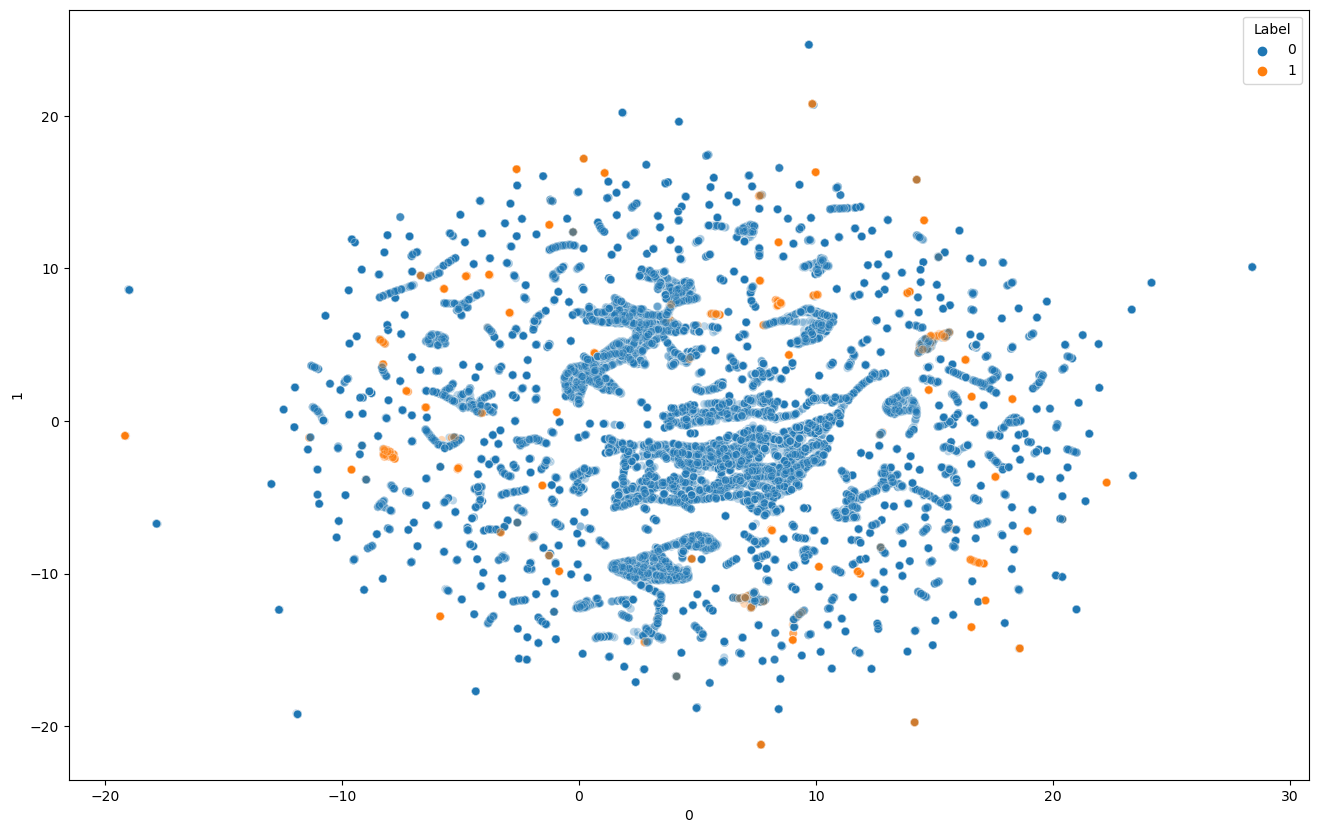

In [ ]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='Label',
    data=embedding_df,
    legend='full',
    alpha=0.3,
)


In [ ]:
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination=0.005).fit_predict(normalized_df[:100000])
embedding_df['outlier'] = outlier_scores

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='0', ylabel='1'>

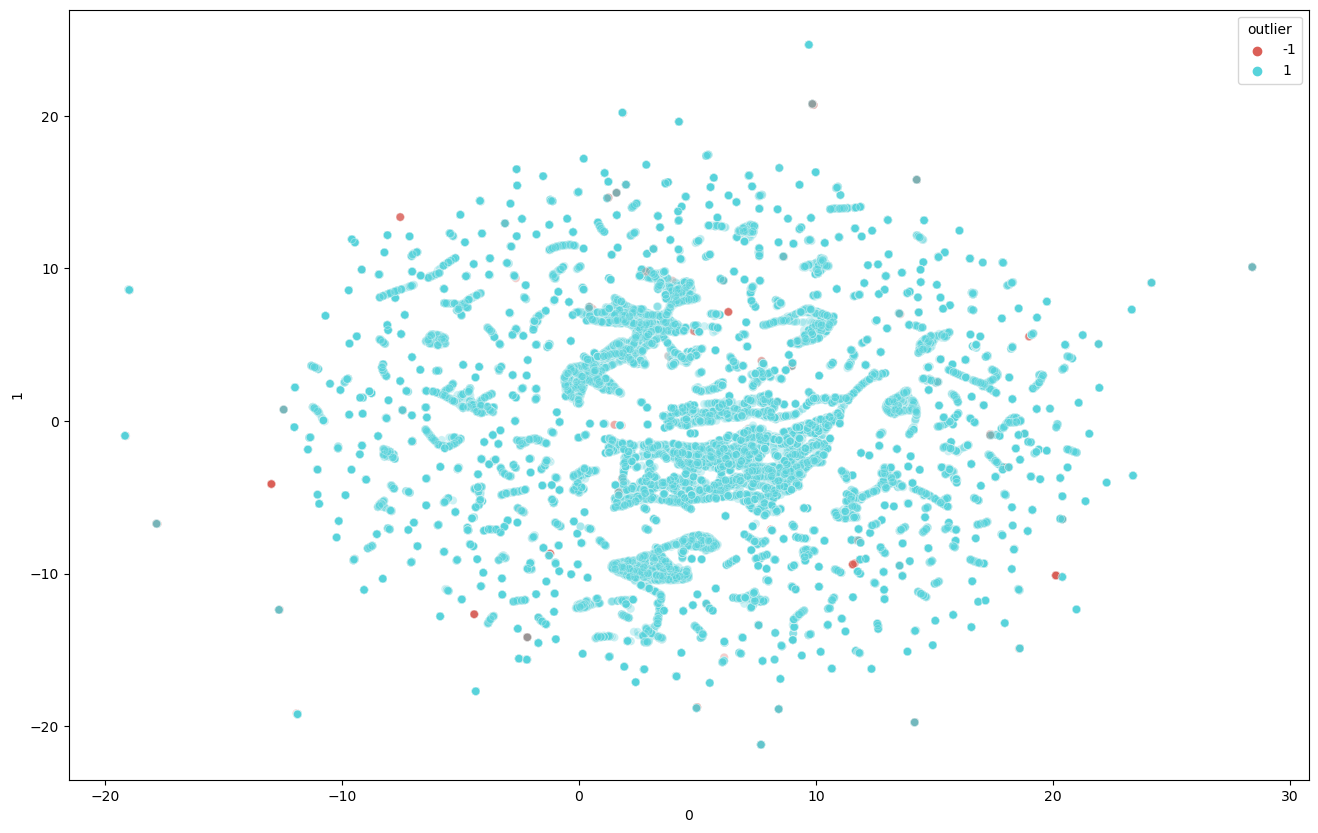

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='outlier',
    data=embedding_df,
    palette=sns.color_palette("hls", 2),
    legend='full',
    alpha=0.3,
)


##### PCA(10) => Isolation Forest => UMAP(Visualization)

In [143]:
pca_10d = PCA(n_components=10)
res_10d = pca_10d.fit_transform(normalized_df[:])
pca_10d_df = pd.DataFrame(data=res_10d, columns = [f'PC{i+1}' for i in range(res_10d.shape[1])])
print('Explained variation per principal component: {}'.format(pca_10d.explained_variance_ratio_))

# reducer = umap.UMAP(n_neighbors=200,
#                     min_dist=0.0,
#                     n_components=2,
#                     random_state=42)
# pca_embedding = reducer.fit_transform(pca_10d_df)
# pca_embedding_df = pd.DataFrame(pca_embedding)
# pca_embedding_df['strLabel'] = df[:100000]['strLabel']



Explained variation per principal component: [0.23940937 0.11790416 0.08023955 0.0661455  0.05469402 0.04966395
 0.04238696 0.03913089 0.03838072 0.03291808]


In [57]:

lof = sklearn.neighbors.LocalOutlierFactor(contamination=1/15)
outlier_prediction = lof.fit_predict(res_10d)
outlier_scores = lof.negative_outlier_factor_
pca_10d_df['lof_scores'] = outlier_scores
pca_10d_df['Label'] = df[:]['Label'].values
pca_10d_df['strLabel'] = df[:]['strLabel'].values
# pca_embedding_df['outlier'] = outlier_scores

<Figure size 1600x1000 with 0 Axes>


The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.


<Axes: xlabel='0', ylabel='1'>

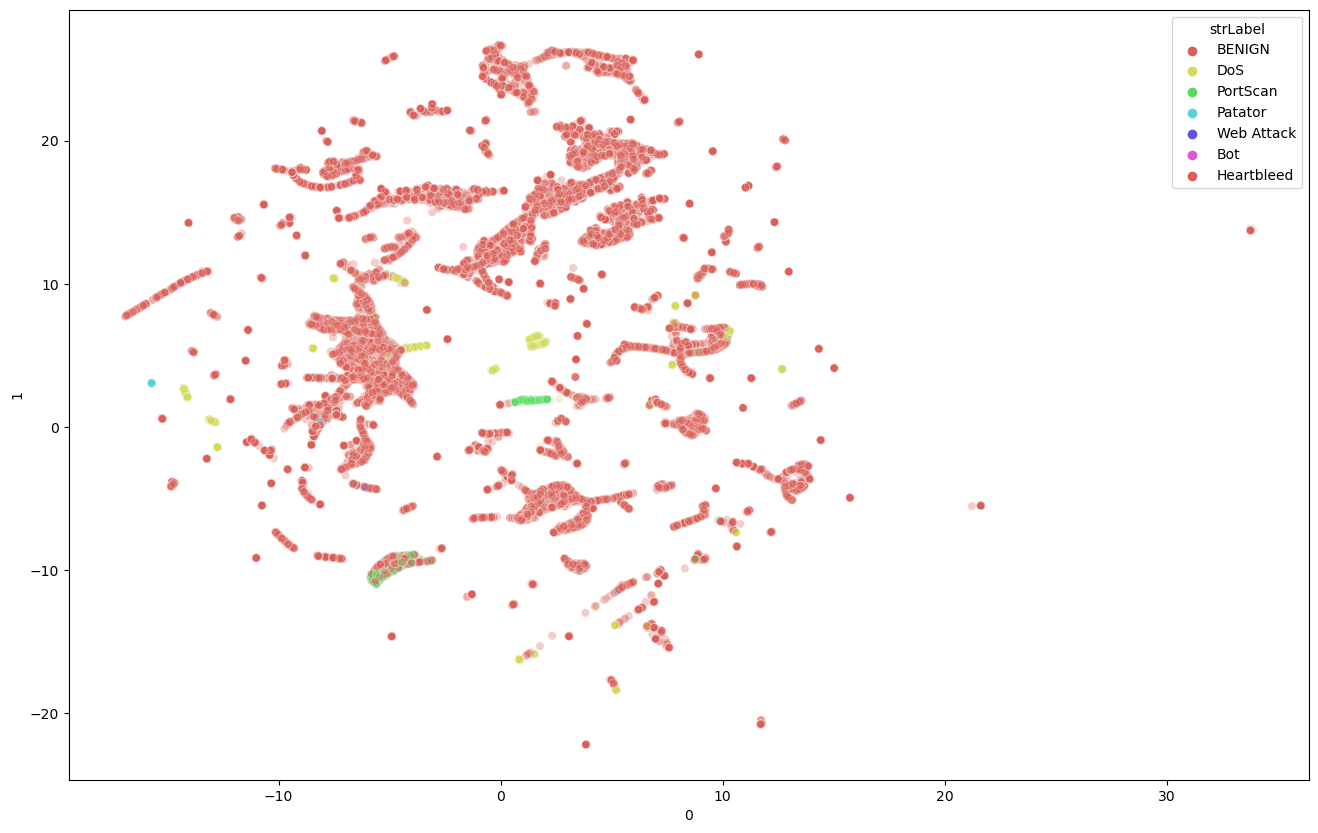

In [90]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='strLabel',
    data=pca_embedding_df,
    palette=sns.color_palette("hls", 6),
    legend='full',
    alpha=0.3,
)


In [84]:
pca_10d_df.iloc[:,:9]

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.475957 -0.292803  0.025449  1.339830  0.961885 -0.180645  0.051295   
1      -2.009794 -0.524270  0.180023 -3.831423 -2.174842 -1.568012  0.308851   
2      -1.632038 -0.450495  0.073371 -0.518676 -0.340303  0.115305 -0.028174   
3      -1.866579 -0.567212  0.167578 -2.914417 -0.955153 -0.252267 -0.087820   
4      -1.837388 -0.589728  0.155608 -2.478291 -0.782783 -0.313605 -0.051079   
...          ...       ...       ...       ...       ...       ...       ...   
999995 -1.554882 -0.374749  0.044007  0.975560  0.737628 -0.068703  0.038632   
999996  4.854111  7.269015 -1.215523  2.813561 -1.936189 -3.478981  0.085575   
999997 -1.364405  0.015421 -0.030741  0.197998 -0.375346  0.764107 -0.104558   
999998 -1.425078 -0.217060  0.011523  1.554643  1.073764 -0.365781  0.079748   
999999  4.898895  1.129241 -0.290509  0.290328 -1.231864  2.839885 -0.258091   

             PC8       PC9  
0      -0.614866 -0.041206  
1      -1.633308  3.066858  
2       0.090090 -0.628071  
3       1.080192 -2.124390  
4       0.705107 -1.839636  
...          ...       ...  
999995 -0.519874  0.034503  
999996  2.287755  1.020633  
999997  0.510499  0.321990  
999998 -0.790055  0.056488  
999999  0.343950  0.217688  

[1000000 rows x 9 columns]

##### IsolationForest

In [155]:
pca_10d_df

PC1        PC2       PC3       PC4       PC5       PC6  \
0        -1.630511  -0.415668  0.032501  0.487645 -0.420229  0.160694   
1        -1.516546  -0.316168  0.015167 -1.302234  0.732177 -0.574366   
2         3.763342  -0.092393  0.062263  0.267775  1.065061  3.635974   
3        -1.880818  -0.424004  0.064492  3.058494 -2.066671 -0.449919   
4        18.661123 -23.637531  1.223327 -3.161891 -0.376627 -3.386668   
...            ...        ...       ...       ...       ...       ...   
2440386   3.742645  -0.766553  0.178982  1.674831  1.351414  1.912679   
2440387  -0.314690   1.130047  0.006096 -0.401598  0.274907  0.517798   
2440388  -0.926992  -0.808485  0.028254  0.495123 -0.534128  0.147223   
2440389  -1.854738  -0.562200  0.072929  2.473733 -1.085566 -0.265395   
2440390  -1.483456  -0.312010  0.011127 -1.552162  0.874598 -0.808172   

              PC7       PC8       PC9      PC10  scores  isoT_scores  Label  
0        0.053881 -0.586548  0.031535  0.070431       1     0.284218      0  
1        0.660899  0.020516 -0.016556  0.236778       1     0.291329      0  
2        0.253777  0.162402 -0.165314 -1.667955       1     0.199982      0  
3        0.496740  1.941192 -0.095812  0.203035       1     0.231727      0  
4       -6.776699  3.624903  0.083268  0.689002      -1    -0.070726      0  
...           ...       ...       ...       ...     ...          ...    ...  
2440386  0.747047 -0.366378 -0.106825 -0.886178       1     0.183536      0  
2440387 -1.055289  0.196760 -0.015858 -0.957917       1     0.246558      0  
2440388  0.233181 -0.821660  0.039299  0.092061       1     0.269763      2  
2440389 -0.386363 -1.943605  0.164568  1.092489       1     0.239517      0  
2440390  0.782638  0.082278 -0.016883  0.399741       1     0.283433      0  

[2440391 rows x 13 columns]

In [159]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=1/30,random_state=42)
model.fit(res_10d)
scores = model.decision_function(res_10d)
anomaly_scores = model.predict(res_10d)
pca_10d_df['scores'] = anomaly_scores
pca_10d_df['isoT_scores'] = scores
pca_10d_df['Label'] = df[:]['Label'].values
pca_10d_df['strLabel'] = df[:]['strLabel'].values

pca_10d_df


IsolationForest(contamination=0.03333333333333333, random_state=42)

PC1        PC2       PC3       PC4       PC5       PC6  \
0        -1.630511  -0.415668  0.032501  0.487645 -0.420229  0.160694   
1        -1.516546  -0.316168  0.015167 -1.302234  0.732177 -0.574366   
2         3.763342  -0.092393  0.062263  0.267775  1.065061  3.635974   
3        -1.880818  -0.424004  0.064492  3.058494 -2.066671 -0.449919   
4        18.661123 -23.637531  1.223327 -3.161891 -0.376627 -3.386668   
...            ...        ...       ...       ...       ...       ...   
2440386   3.742645  -0.766553  0.178982  1.674831  1.351414  1.912679   
2440387  -0.314690   1.130047  0.006096 -0.401598  0.274907  0.517798   
2440388  -0.926992  -0.808485  0.028254  0.495123 -0.534128  0.147223   
2440389  -1.854738  -0.562200  0.072929  2.473733 -1.085566 -0.265395   
2440390  -1.483456  -0.312010  0.011127 -1.552162  0.874598 -0.808172   

              PC7       PC8       PC9      PC10  scores  isoT_scores  Label  \
0        0.053881 -0.586548  0.031535  0.070431       1     0.284218      0   
1        0.660899  0.020516 -0.016556  0.236778       1     0.291329      0   
2        0.253777  0.162402 -0.165314 -1.667955       1     0.199982      0   
3        0.496740  1.941192 -0.095812  0.203035       1     0.231727      0   
4       -6.776699  3.624903  0.083268  0.689002      -1    -0.070726      0   
...           ...       ...       ...       ...     ...          ...    ...   
2440386  0.747047 -0.366378 -0.106825 -0.886178       1     0.183536      0   
2440387 -1.055289  0.196760 -0.015858 -0.957917       1     0.246558      0   
2440388  0.233181 -0.821660  0.039299  0.092061       1     0.269763      2   
2440389 -0.386363 -1.943605  0.164568  1.092489       1     0.239517      0   
2440390  0.782638  0.082278 -0.016883  0.399741       1     0.283433      0   

        strLabel  
0         BENIGN  
1         BENIGN  
2         BENIGN  
3         BENIGN  
4         BENIGN  
...          ...  
2440386   BENIGN  
2440387   BENIGN  
2440388      DoS  
2440389   BENIGN  
2440390   BENIGN  

[2440391 rows x 14 columns]

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='0', ylabel='1'>

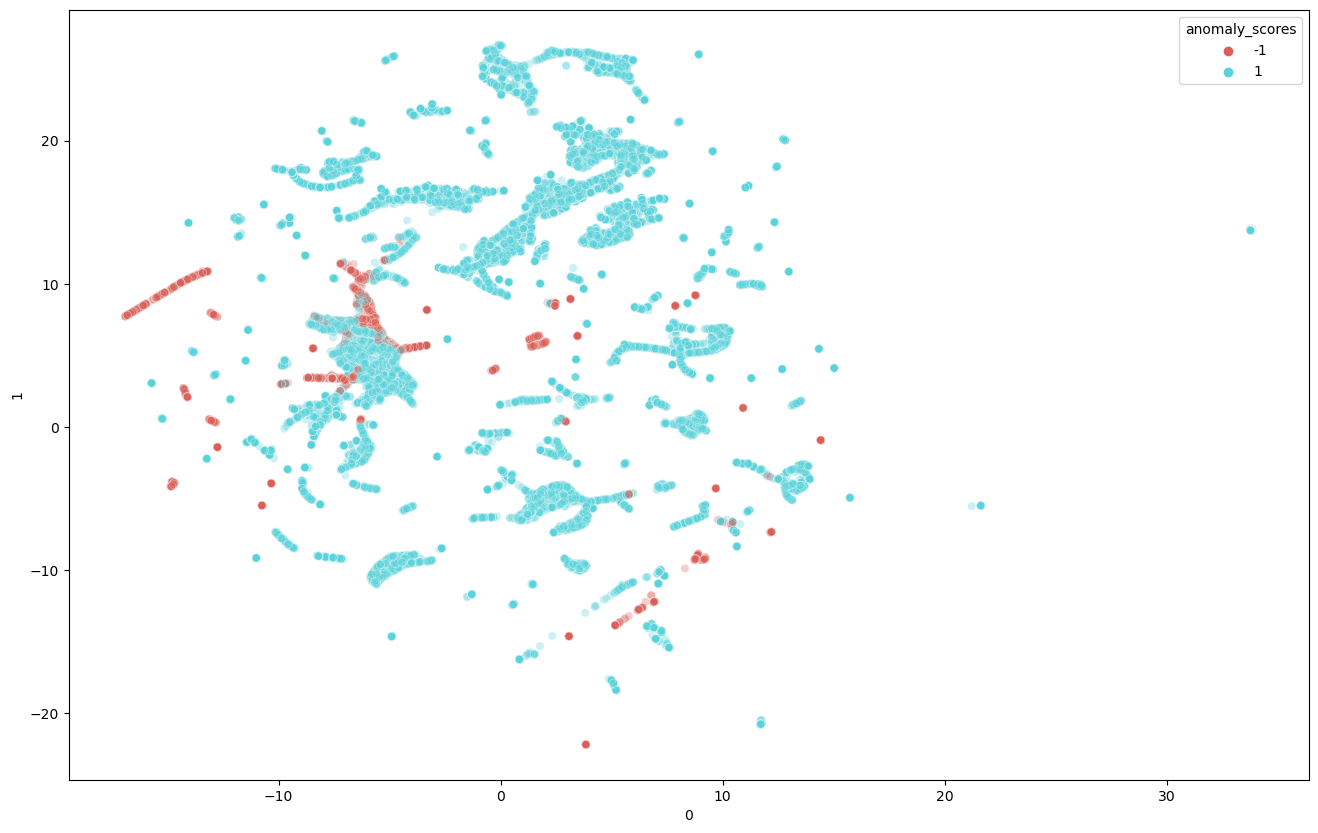

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='anomaly_scores',
    data=pca_embedding_df,
    palette=sns.color_palette("hls", 2),
    legend='full',
    alpha=0.3,
)


##### Anomaly Score Distribution for each Labels

<Figure size 2000x1200 with 0 Axes>


The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.


<Axes: xlabel='isoT_scores', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scores for Each Label')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Frequency')

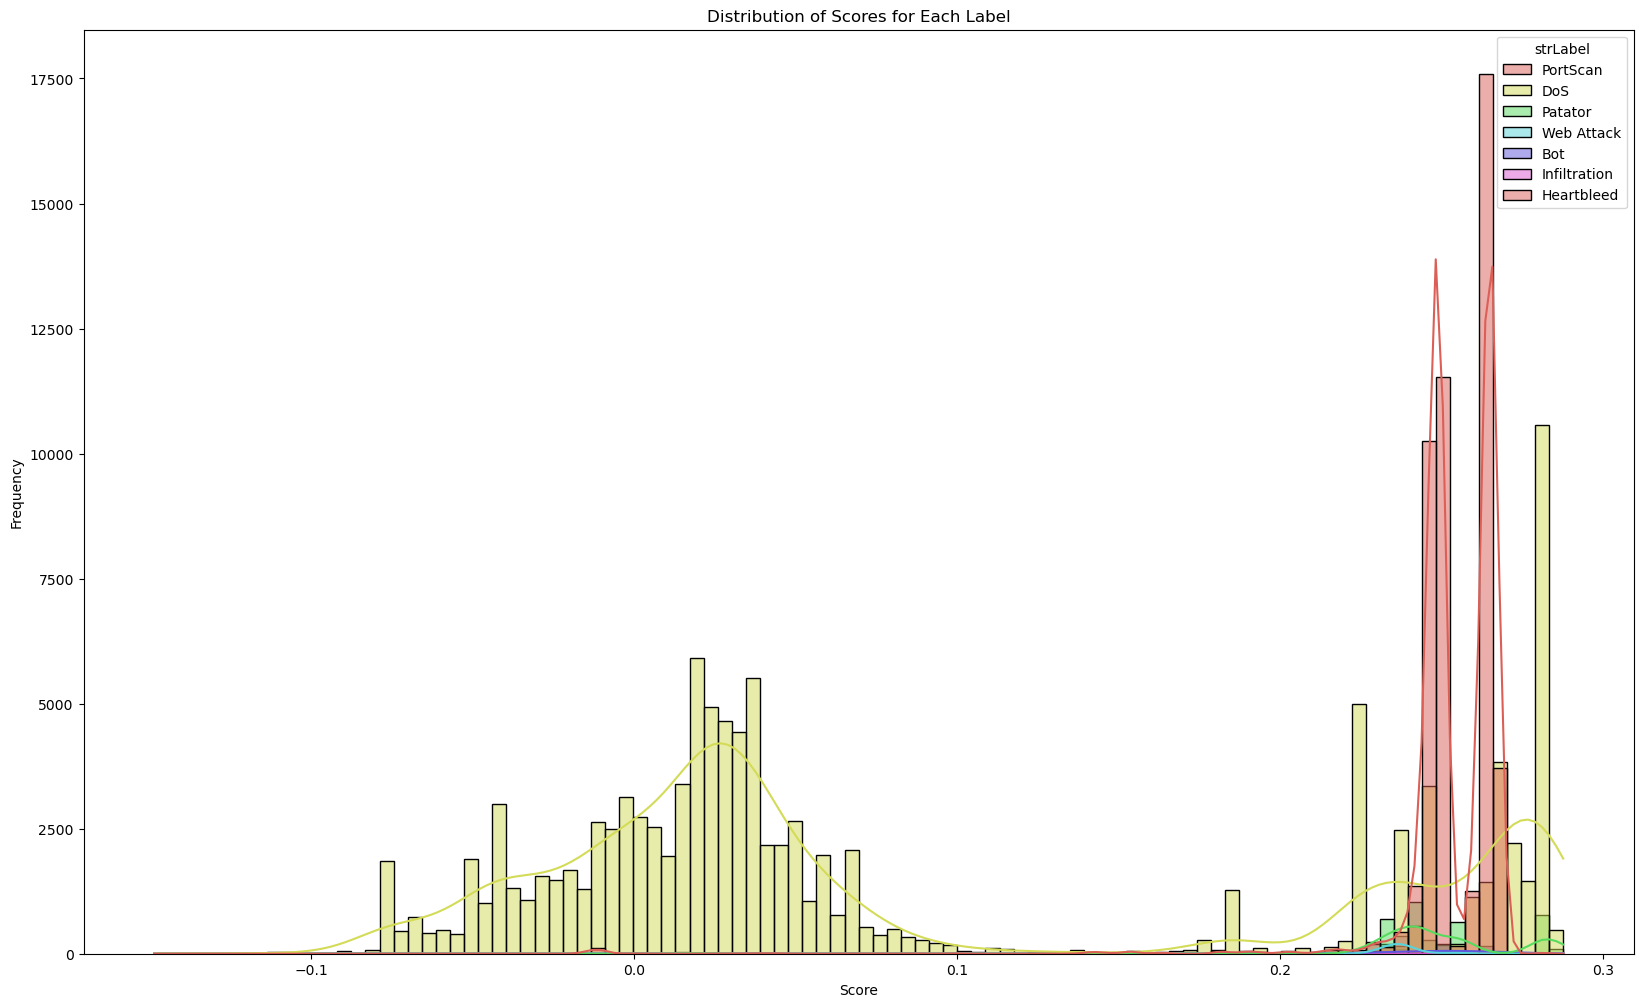

In [162]:
plt.figure(figsize=(20, 12))
# att_df = pca_10d_df.loc[pca_10d_df['Label'] == 1]
sns.histplot(data=pca_10d_df, x='isoT_scores', hue='strLabel', palette=sns.color_palette("hls",6), kde=True, bins=100)  # KDE adds a density plot
plt.title('Distribution of Scores for Each Label')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [41]:
df.iloc[:,:-3]

Destination Port  Flow Duration  Total Fwd Packets  \
0                      53          24218                  2   
1                   55268              2                  2   
2                     443            624                  2   
3                   56372            116                  1   
4                   45643            112                  1   
...                   ...            ...                ...   
2384621                80      119997744                 15   
2384622                22        1561949                 35   
2384623                80        6083515                  4   
2384624             51652             66                  1   
2384625                53         163298                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             2                           90   
1                             0                           31   
2                             0                           12   
3                             1                            0   
4                             1                            0   
...                         ...                          ...   
2384621                      15                         3006   
2384622                      40                         2686   
2384623                       0                           24   
2384624                       1                            6   
2384625                       1                           57   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                248                     45   
1                                  0                     31   
2                                  0                      6   
3                                  0                      0   
4                                  0                      0   
...                              ...                    ...   
2384621                         1586                    978   
2384622                         6718                    408   
2384623                            0                      6   
2384624                            6                      6   
2384625                          140                     57   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           45               45.000000               0.000000   
1                            0               15.500000              21.920310   
2                            6                6.000000               0.000000   
3                            0                0.000000               0.000000   
4                            0                0.000000               0.000000   
...                        ...                     ...                    ...   
2384621                      6              200.400000             402.446234   
2384622                      0               76.742857             105.426959   
2384623                      6                6.000000               0.000000   
2384624                      6                6.000000               0.000000   
2384625                     57               57.000000               0.000000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                          124                    124              124.000000   
1                            0                      0                0.000000   
2                            0                      0                0.000000   
3                            0                      0                0.000000   
4                            0                      0                0.000000   
...                        ...                    ...                     ...   
2384621                    784                      0              105.733333   
2384622                    976                      0              167.950000   
2384623                 

##### Inference

In [314]:
reducer = umap.UMAP(n_neighbors=100,
                    min_dist=0.0,
                    n_components=10,
                    random_state=42)
embedding_10d = reducer.fit_transform(normalized_df[:50000])
embedding_10d_df = pd.DataFrame(embedding_10d)
embedding_10d_df['Label'] = df[:50000]['Label']

SystemError: CPUDispatcher(<function nn_descent at 0x2a26360c0>) returned a result with an exception set

In [279]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10000, min_cluster_size=1024).fit_predict(embedding_10d)
embedding_df['pred_labels'] = hdbscan_labels
embedding_df['pred_labels'] = embedding_df['pred_labels'].apply(lambda x: 0 if x!=-1 else 1)

KeyboardInterrupt: 

<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='0', ylabel='1'>

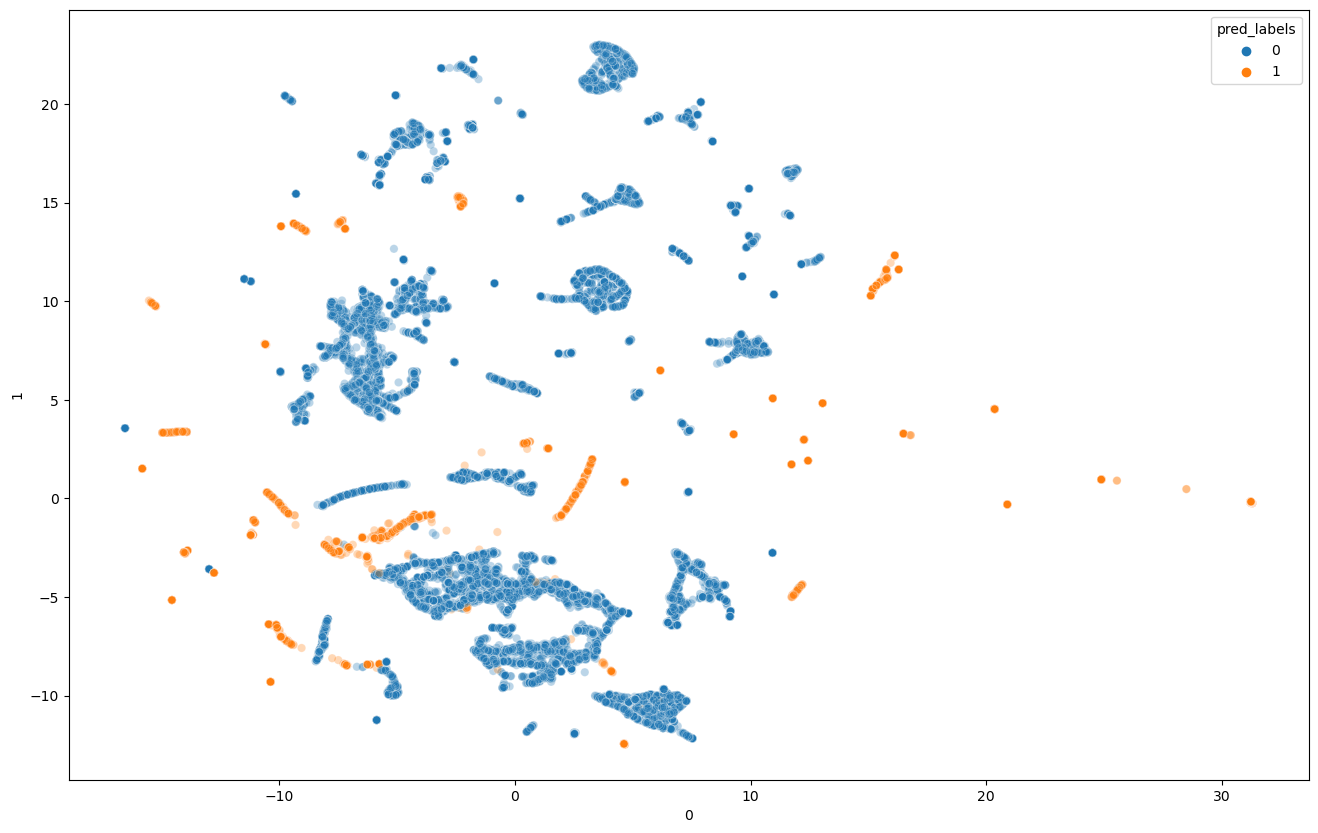

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='pred_labels',
    data=embedding_df,
    legend='full',
    alpha=0.3,
)

